In [5]:
# **Assignmetn 6**
## Exploratory Data Analysis (EDA) and Hypothesis Testing
#### Tsion Tedla

In [110]:
### **Importing Libraries**
##### -> Function: I am importing (and installing) the necessary libraries 
#####   I will need throughout this assignment from importing the data to analyzing the data.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo
from scipy.stats import chi2_contingency
!pip install scikit-learn
from sklearn.linear_model import LinearRegression

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 23.4 MB/s eta 0:00:00 0:00:01


In [111]:
### **Importing Dataset**
##### -> Function: I am importing my data (student-mat.csv) from my computer to jupyter notebook, 
#####    specifically to here inorder to have access to it for the remaining assignment

In [10]:
df = pd.read_csv('Downloads/student+performance/student/student-mat.csv', sep=";")
display(df.head())
display(df.tail())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [20]:
### Exploratory Data Analysis (EDA)
##### -> Function: Here I am exploring the dataset's structure, summary statistics, and distributions.
#####    Since this will produce output I will do each of them in seperate cells.

In [21]:
###### prints all the columns of my data
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [23]:
###### prints a summary of my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [25]:
###### prints the number of distinct values in each column in my data (for instance there are 2 schools do school would be 2)
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [26]:
###### gives numeric and descriptive summury for each column (ex: mean , count, std, min, max....)
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [112]:
### **Data Visualization**
##### -> Function: Visualize key features using appropriate plots (scatter plots, histograms, box plots, etc.)

In [113]:
#### **Data Visualization(1): Family and School Support**
######   -> Here I will be comparing the family support and school support student recieves with other factors

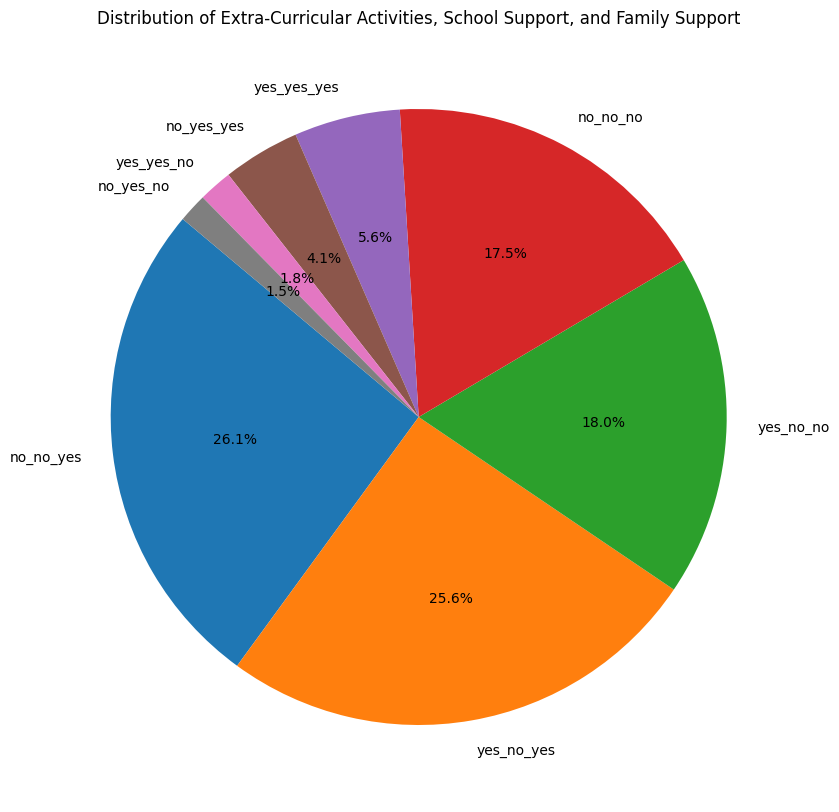

In [32]:
###### Pie Chart to show the relationship between extra-curricular activities and school support.
###### I am combining the 'activities', 'schoolsup', and 'famsup' columns into a single string (e.g., 'yes_no_yes') in order for me to compare everything togethrt.

df['combined_support'] = df['activities'] + '_' + df['schoolsup'] + '_' + df['famsup']
combined_support_counts = df['combined_support'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(combined_support_counts, labels=combined_support_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Extra-Curricular Activities, School Support, and Family Support')
plt.show()

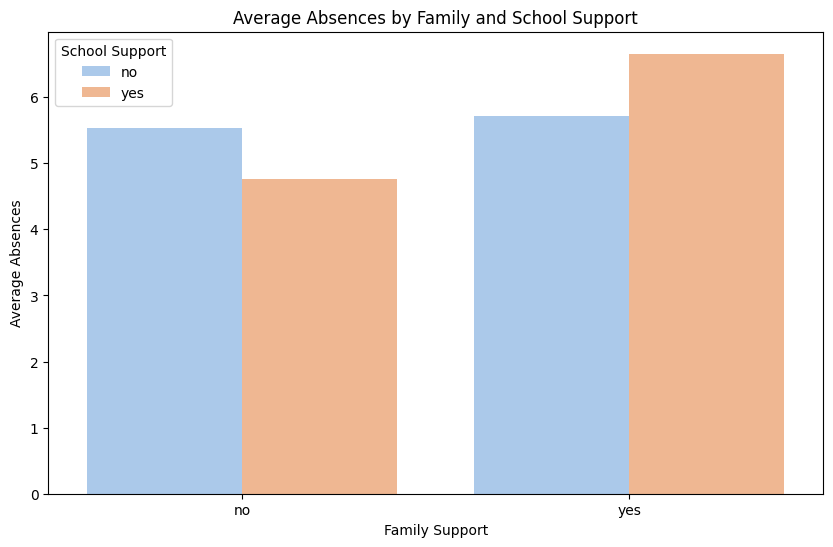

In [35]:
###### Bar plot to show comparison between average number of abscences by student and family support and school support
average_absences_support = df.groupby(['famsup', 'schoolsup'])['absences'].mean().reset_index()
average_absences_support.columns = ['Family Support', 'School Support', 'Average Absences']
plt.figure(figsize=(10, 6))
sns.barplot(x='Family Support', y='Average Absences', hue='School Support', data=average_absences_support, palette='pastel')
plt.title('Average Absences by Family and School Support')
plt.xlabel('Family Support')
plt.ylabel('Average Absences')
plt.show()

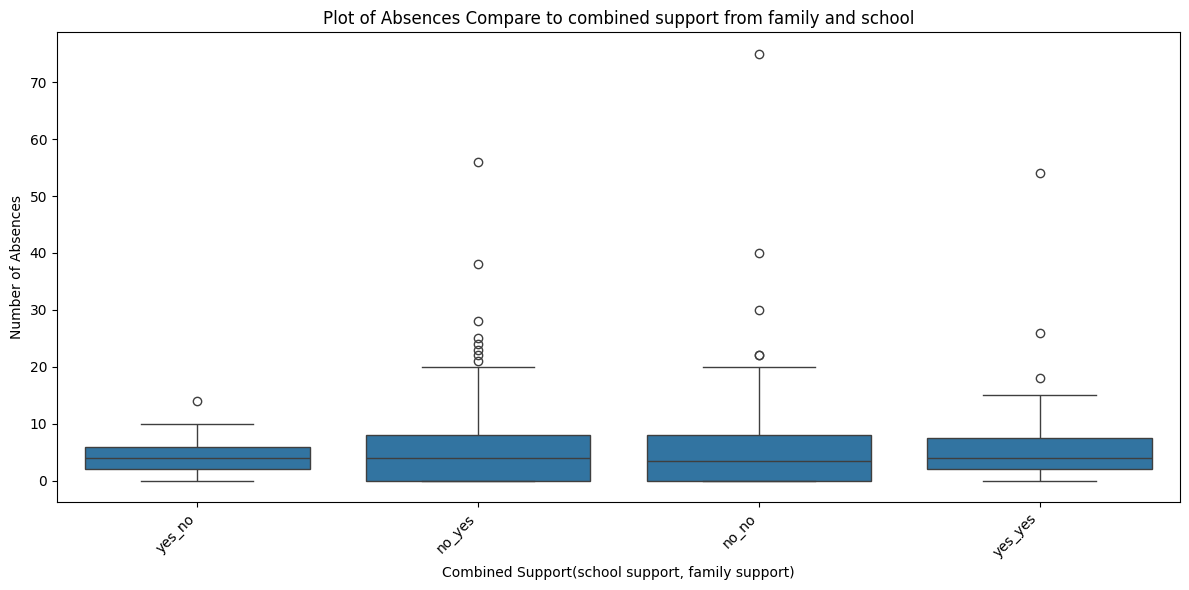

In [36]:
###### Box Plot to show the istribution of Absences by Support Types (like earlier hear i combined family support and school support)
df['combined_support_2'] = df['schoolsup'] + '_' + df['famsup']
plt.figure(figsize=(12, 6))
sns.boxplot(x='combined_support_2', y='absences', data=df)
plt.title('Plot of Absences Compare to combined support from family and school')
plt.xlabel('Combined Support(school support, family support)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Absences')
plt.tight_layout()
plt.show()

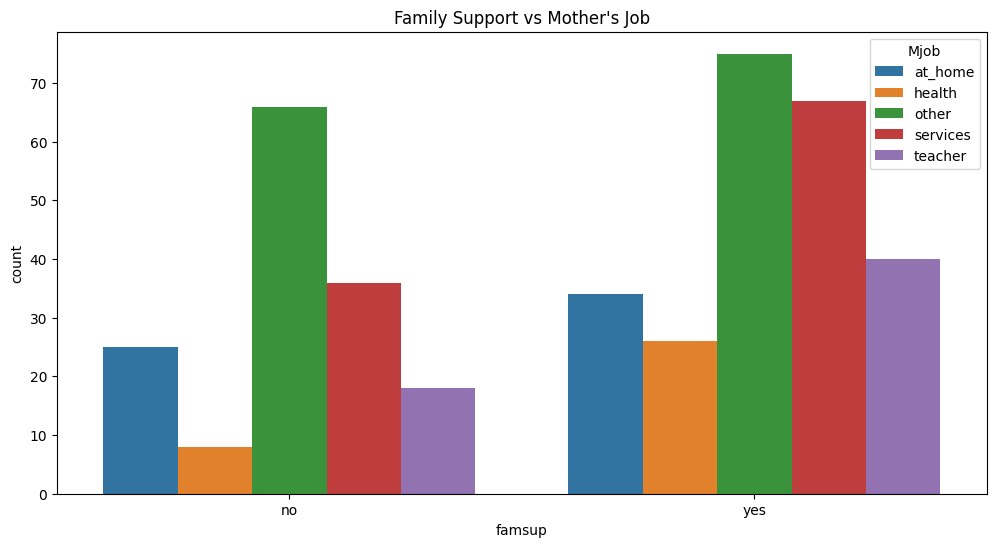

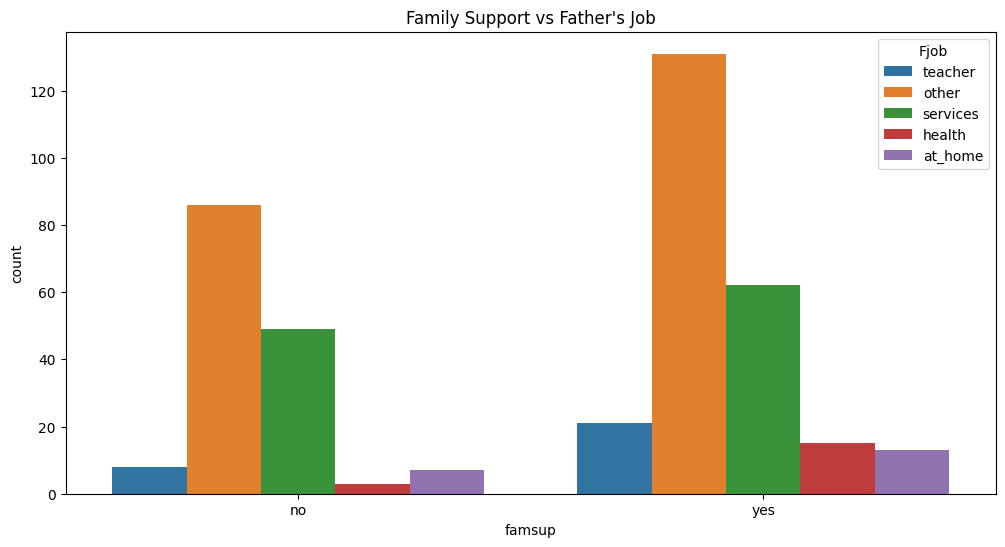

In [44]:
####### Counterplot to show the comparison of Family Support to mothers job and then fathers job
plt.figure(figsize=(12, 6))
sns.countplot(x='famsup', hue='Mjob', data=df, dodge=True)
plt.title('Family Support vs Mother\'s Job')
plt.show()
plt.figure(figsize=(12, 6))
sns.countplot(x='famsup', hue='Fjob', data=df, dodge=True)
plt.title('Family Support vs Father\'s Job')
plt.show()

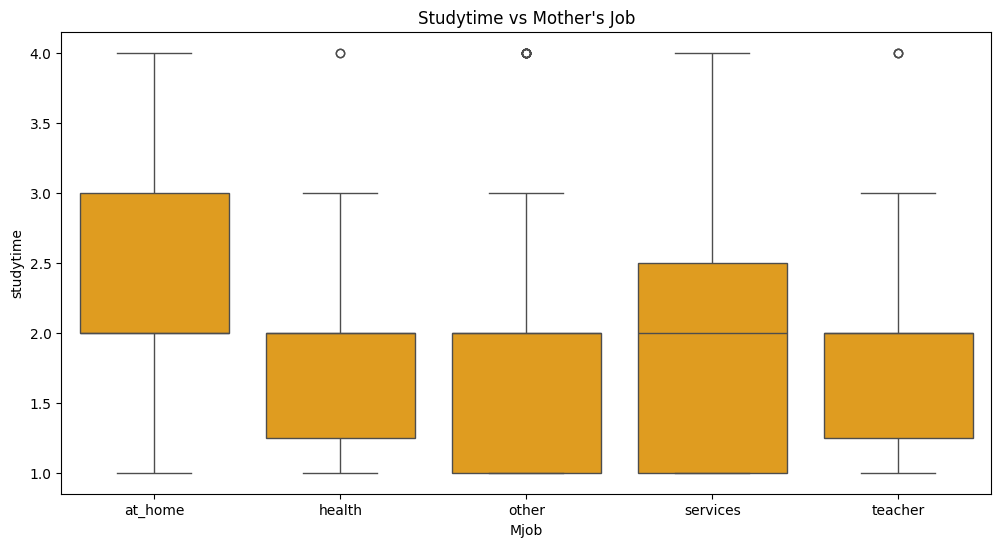

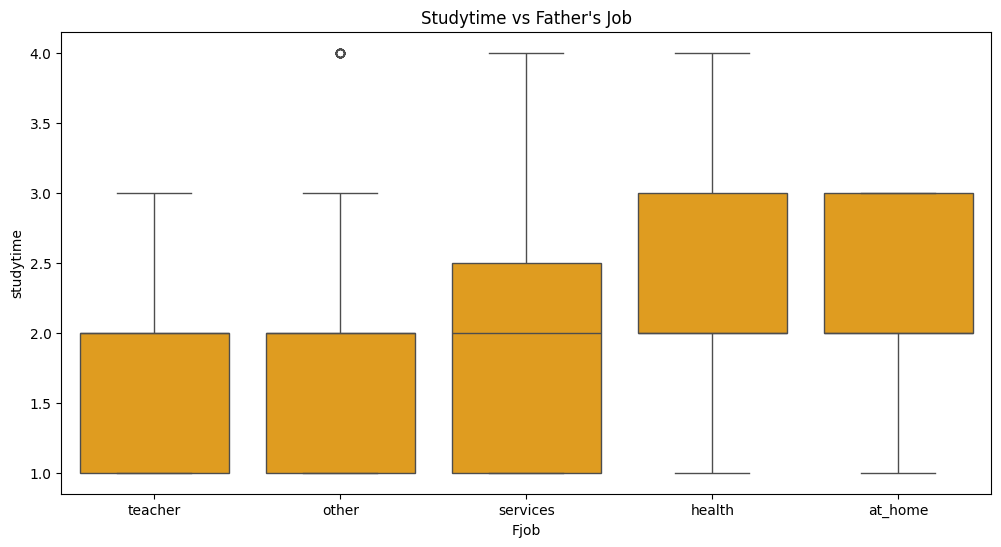

In [78]:
###### Not directly related to family support  but you can see its connection here is a plot of parent's job (mother's job and father's job) compared to study time
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mjob', y='studytime', data=df, color='orange')
plt.title('Studytime vs Mother\'s Job')
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fjob', y='studytime', data=df, color='orange')
plt.title('Studytime vs Father\'s Job')
plt.show()

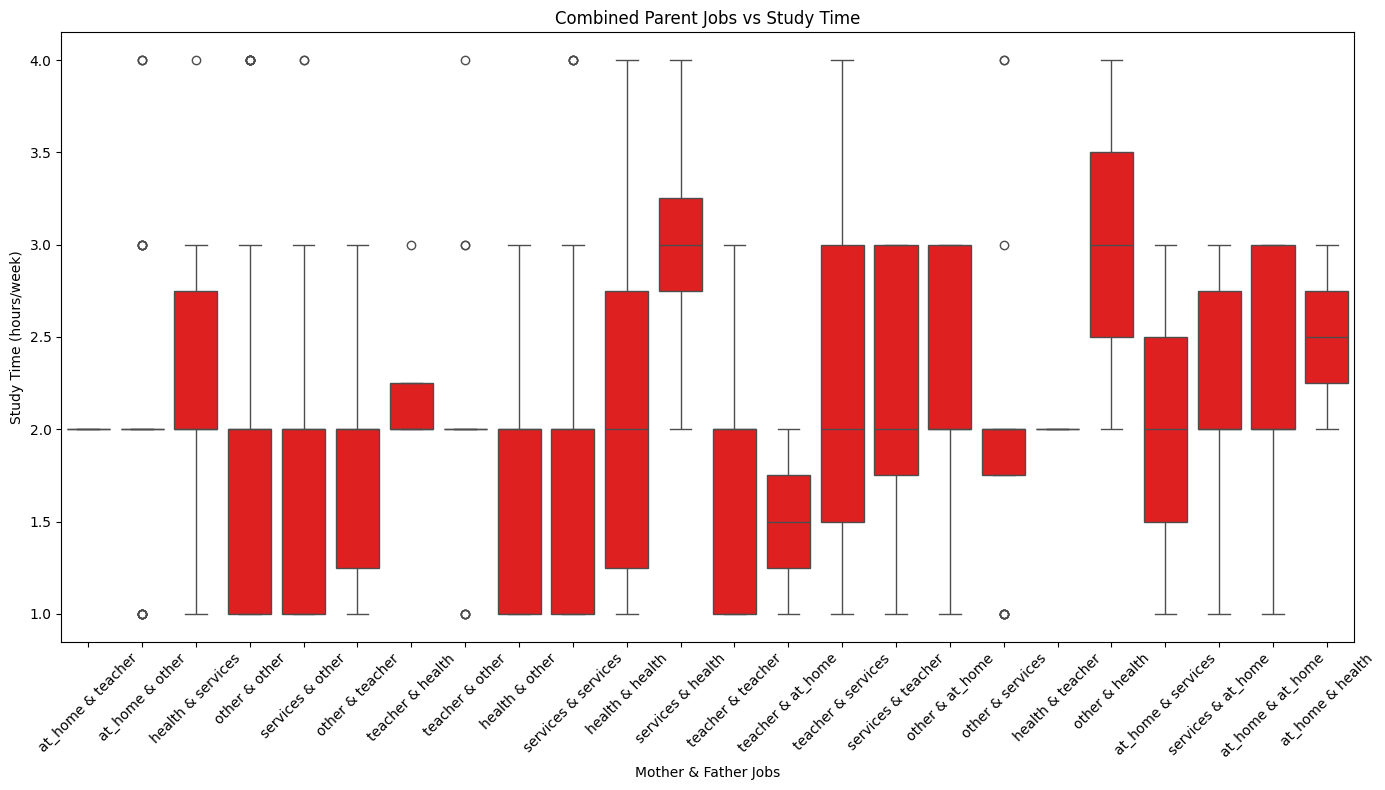

In [67]:
###### This is a follow up to the previous plot but with more detail here I have combined and listed out each variation of mother father job pairing to compare with study time in a box plot
df['ParentJobs'] = df['Mjob'] + ' & ' + df['Fjob']

plt.figure(figsize=(14, 8))
sns.boxplot(x='ParentJobs', y='studytime', data=df, color='red')
plt.title('Combined Parent Jobs vs Study Time')
plt.xlabel('Mother & Father Jobs')
plt.ylabel('Study Time (hours/week)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to fit all elements cleanly
plt.show()

In [114]:
#### **Data Visualization (2): Effect of Going Out With Friends**
######   -> Here I will be comparing the frequeney of how much student go out with friends (from 1 - very low to 5 - very high) with the other factors

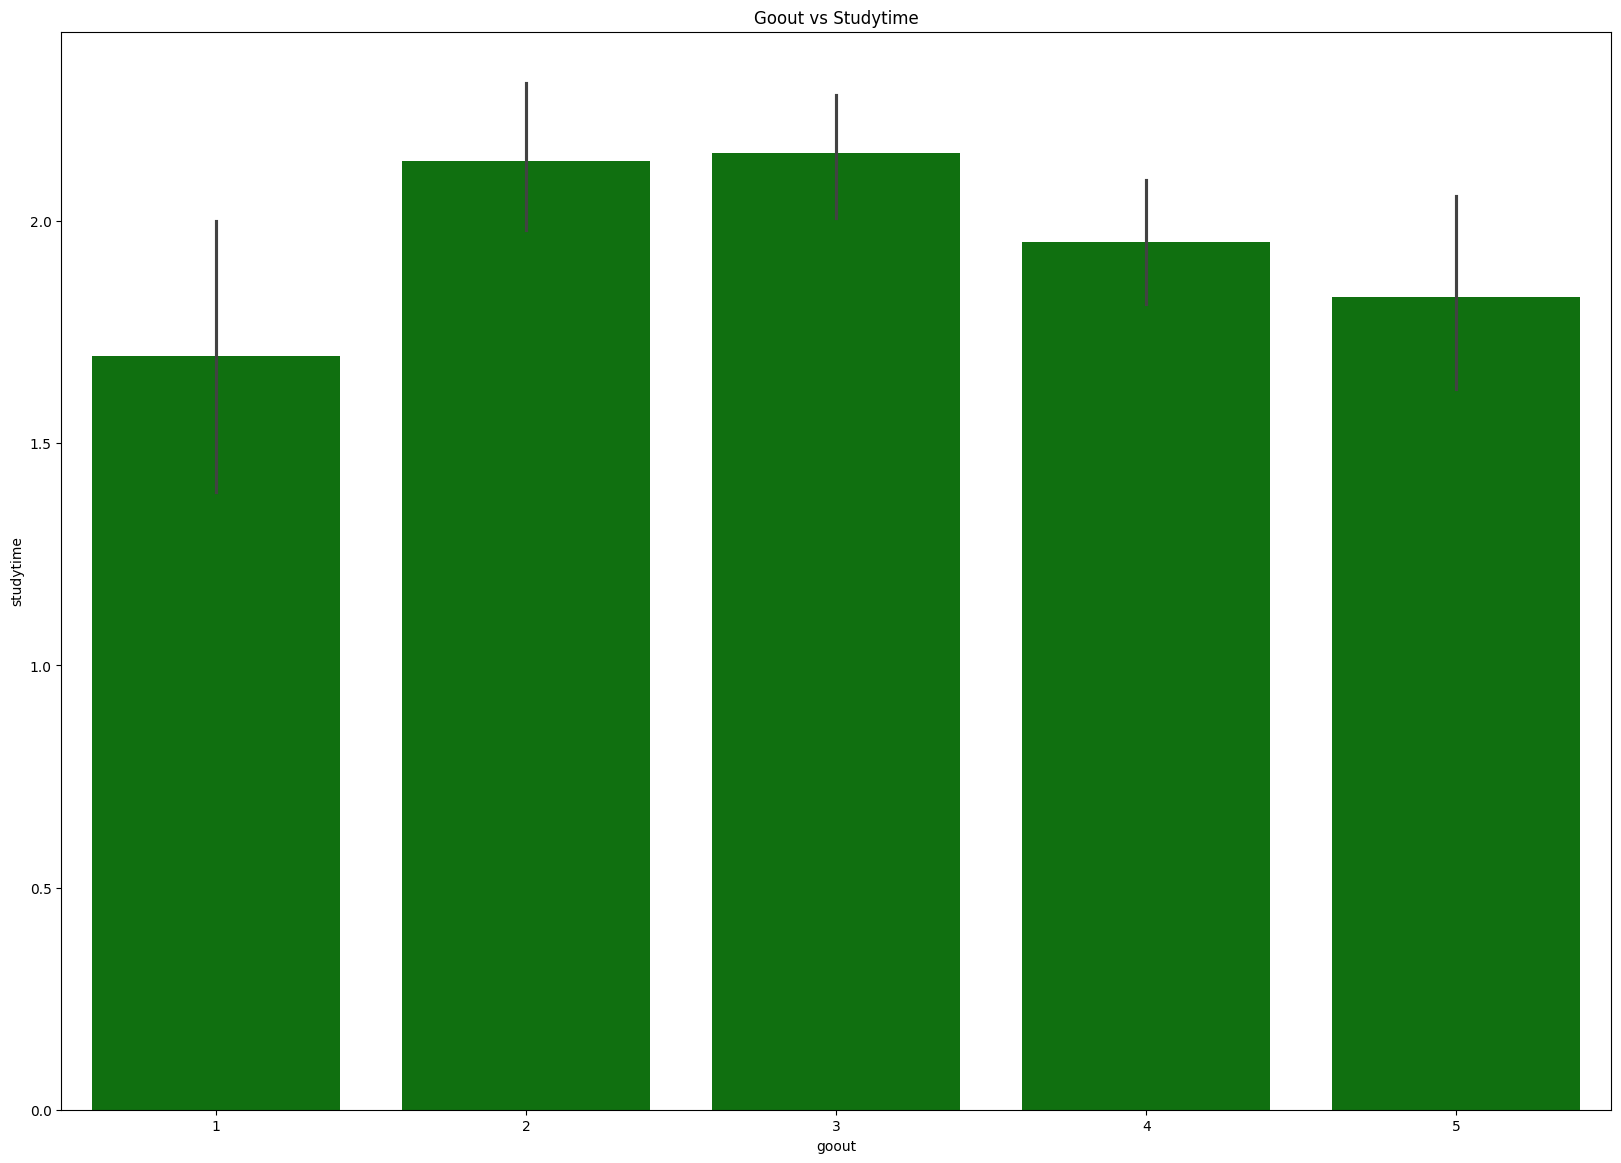

In [68]:
###### Bar Plot to show the relationship betweeen going out with friends to studytime (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) for students
plt.figure(figsize=(20, 14))
sns.barplot(x='goout', y='studytime', data=df, color='green')
plt.title('Goout vs Studytime')
plt.show()

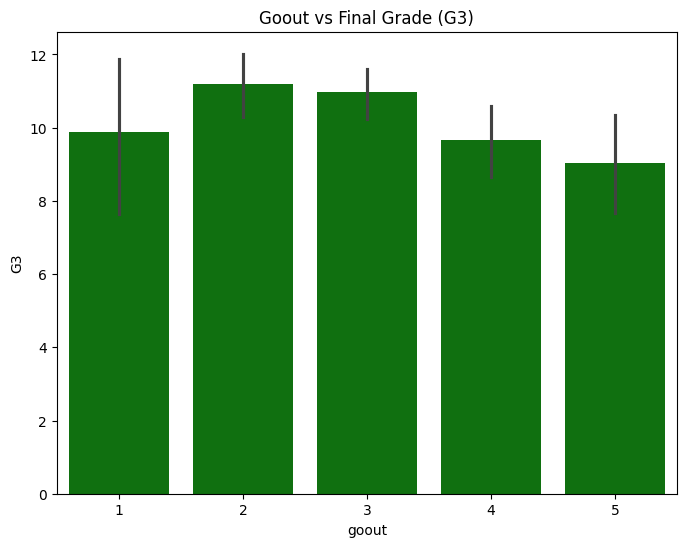

In [69]:
###### Bar Plot to show the relationship betweeen going out with friends to final grade (G3) for students
plt.figure(figsize=(8, 6))
sns.barplot(x='goout', y='G3', data=df, color='green')
plt.title('Goout vs Final Grade (G3)')
plt.show()

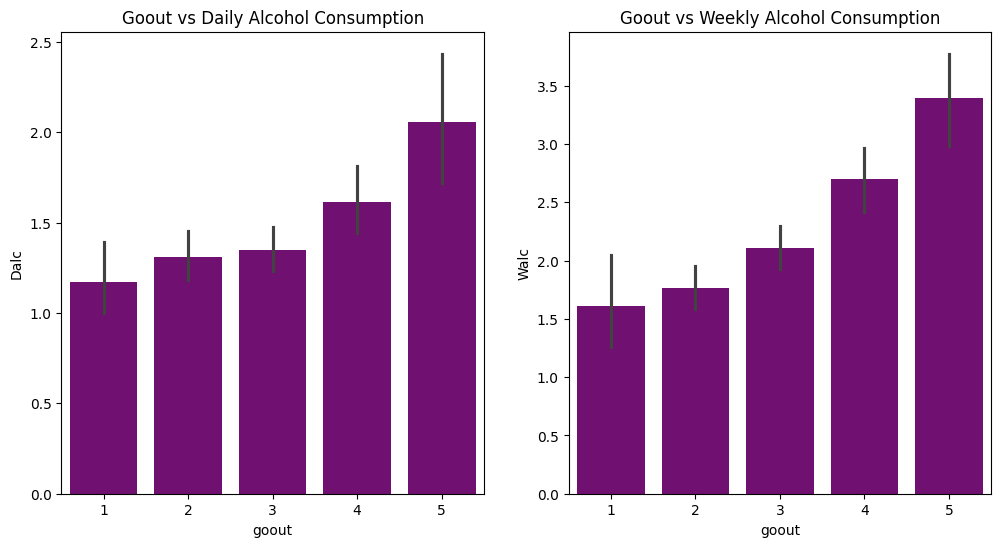

In [72]:
###### Barplot to compare going out wiht friends to alchol consumption (both daily alchol consumption and weekly alcohol consumption)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='goout', y='Dalc', data=df, ax=ax[0], color='purple')
ax[0].set_title('Goout vs Daily Alcohol Consumption')
sns.barplot(x='goout', y='Walc', data=df, ax=ax[1], color='purple')
ax[1].set_title('Goout vs Weekly Alcohol Consumption')
plt.show()

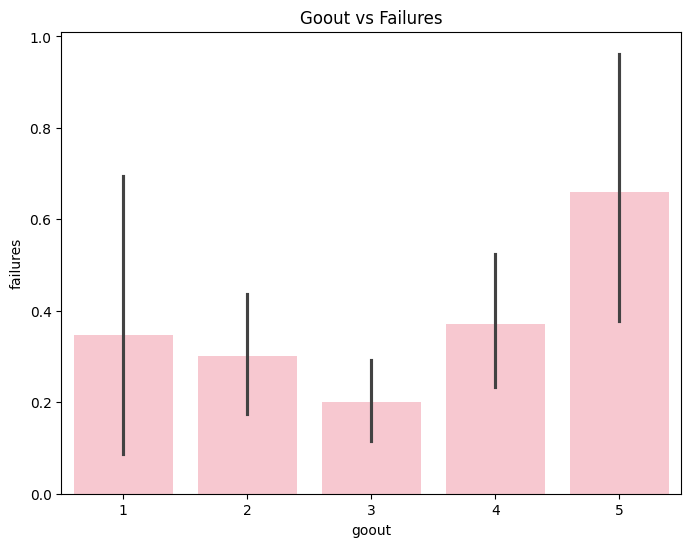

In [73]:
###### Barplot to show comparison between going out with friends and number of past course failures

plt.figure(figsize=(8, 6))
sns.barplot(x='goout', y='failures', data=df, color='pink')
plt.title('Goout vs Failures')
plt.show()

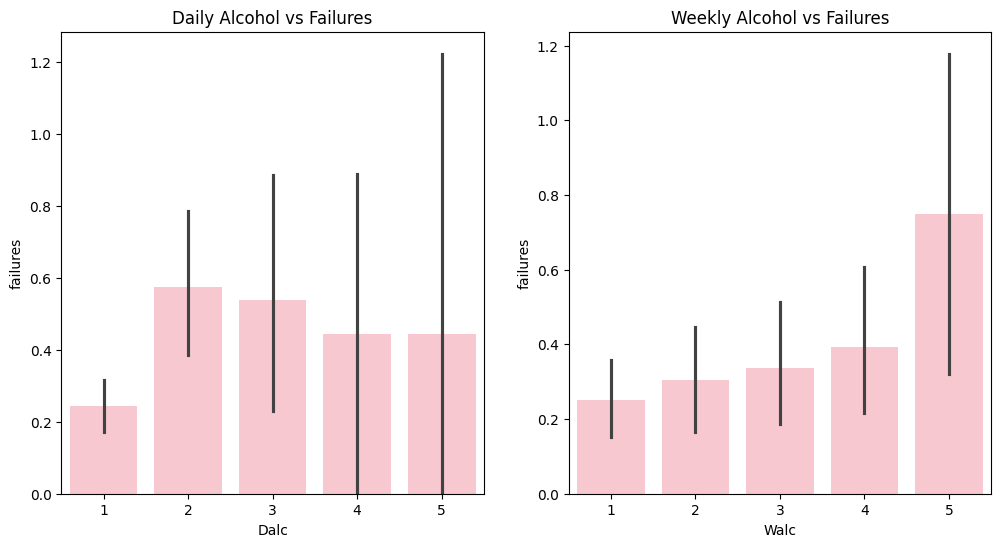

In [75]:
###### Kind of related to going out: barplo fot compariosn of number of course failures to daily and weekly alcohl consumption
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='Dalc', y='failures', data=df, ax=ax[0], color='pink')
ax[0].set_title('Daily Alcohol vs Failures')
sns.barplot(x='Walc', y='failures', data=df, ax=ax[1], color='pink')
ax[1].set_title('Weekly Alcohol vs Failures')
plt.show()

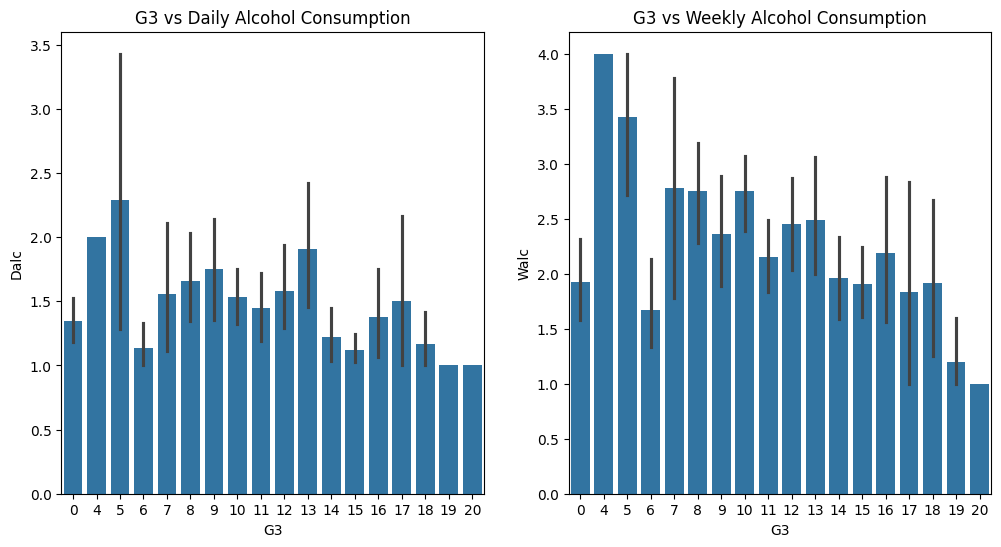

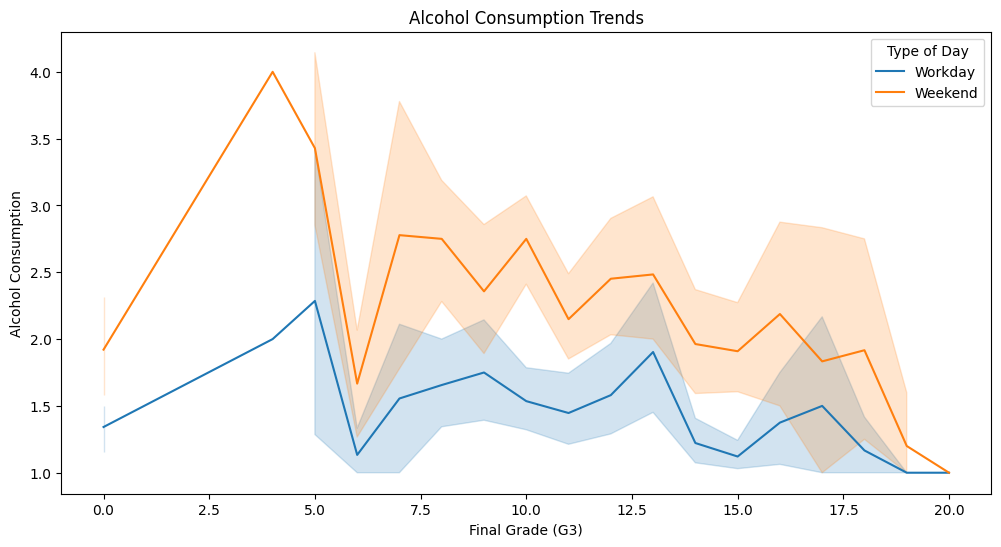

In [80]:
###### Following up on finsings from goin out: barplot for compariosn of final grade (G3) to alcohol consumption (both daily and weekly)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='G3', y='Dalc', data=df, ax=ax[0])
ax[0].set_title('G3 vs Daily Alcohol Consumption')
sns.barplot(x='G3', y='Walc', data=df, ax=ax[1])
ax[1].set_title('G3 vs Weekly Alcohol Consumption')
plt.show()


#A Line chart to show trends in alcohol consumption as grades change, THIS IS BASICALLY THE SAME AS ABOVE BUT ANOTHER TYPE OF PLOT FOR ME TO SEE TO BETTER VISUALIZE
plt.figure(figsize=(12, 6))
sns.lineplot(x='G3', y='Dalc', data=df, label='Workday')
sns.lineplot(x='G3', y='Walc', data=df, label='Weekend')
plt.title("Alcohol Consumption Trends")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Alcohol Consumption")
plt.legend(title="Type of Day")
plt.show()

In [115]:
#### **Data Visualization (3): Miscellaneous**
######   -> Here is the other different visualizations I wanted to try that didn't fit in the above categories

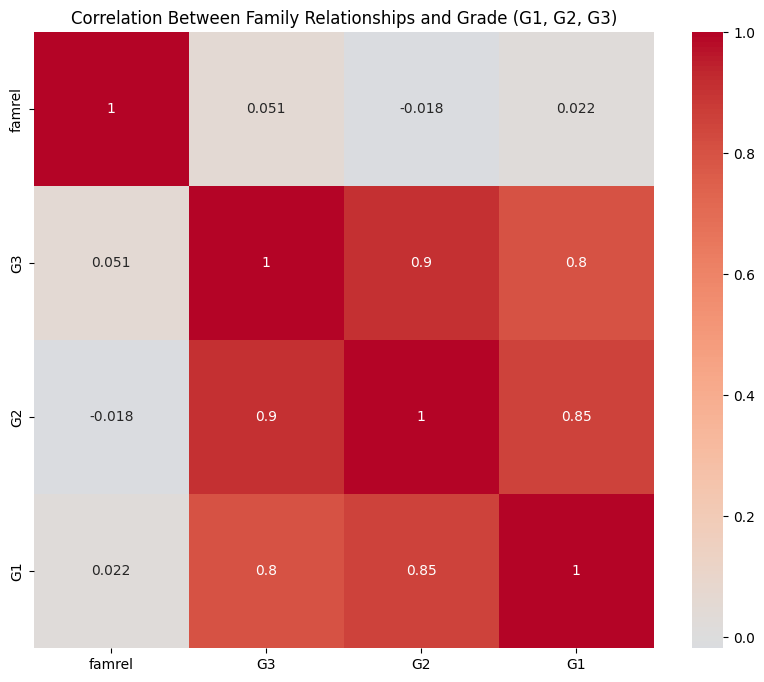

In [57]:
###### Here is a Heatmap of Family Relationships and Academic Performance - analyzing the correlation between family relationships and performance.
correlation_data = df[['famrel', 'G3', 'G2', 'G1']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Family Relationships and Grade (G1, G2, G3)")
plt.show()

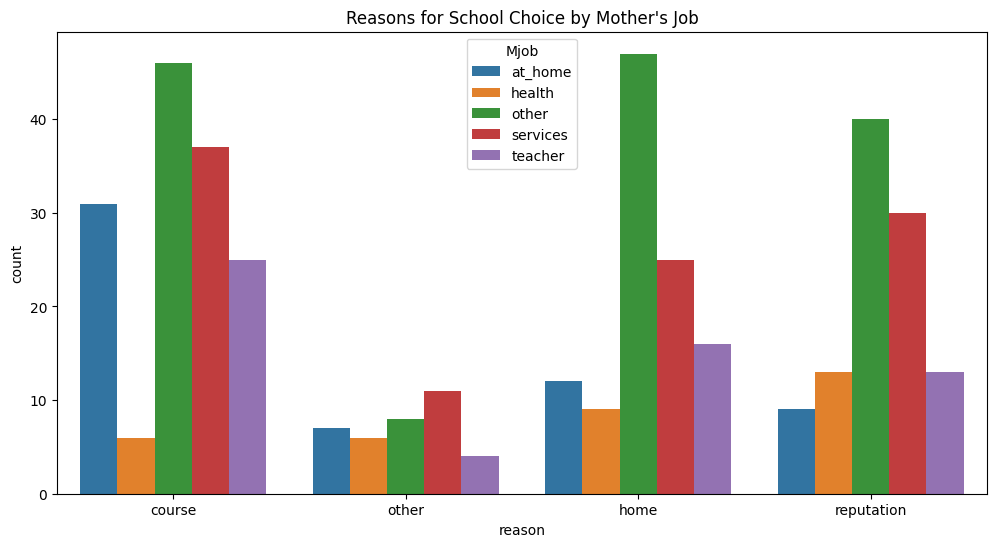

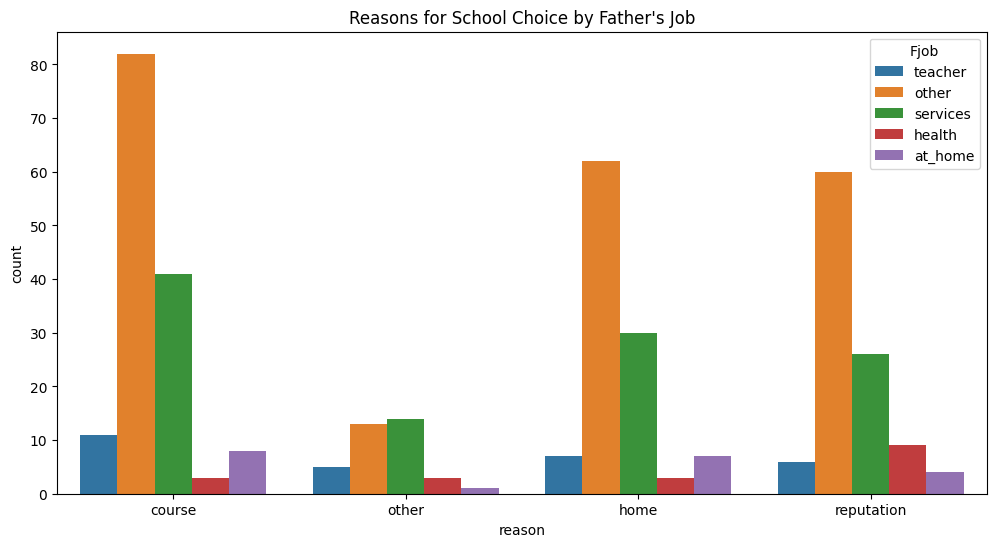

In [76]:
# Countplot for Reasons for School Choice and parent job (father's job and mother's job)
plt.figure(figsize=(12, 6))
sns.countplot(x='reason', hue='Mjob', data=df, dodge=True)
plt.title('Reasons for School Choice by Mother\'s Job')
plt.show()
plt.figure(figsize=(12, 6))
sns.countplot(x='reason', hue='Fjob', data=df, dodge=True)
plt.title('Reasons for School Choice by Father\'s Job')
plt.show()

In [117]:
### **Hypothesis Formulation**
##### -> Function: Formulating 2 hypotheses based on what I have observed from the data through the data vizulization and such

In [97]:
#### Hypothesis #1: Students with a parent at home have a higher weekly study time. Specifically 
#### students with parent's (either mother or father or both) who's job is "at home" have a higher study time on average.

##### I made this hypothesis after studying the results I got from the last 3 plots in "Data Visualization(1): Family and School Support", 
##### specifically the study time vs father's/mother's job boxplot and the combined parent's jobs vs study time box plot that follows

In [98]:
#### Hypothesis #2: Higher alcohol consumption (weekly) affects final grade (G3) negatively. Specificlally 
#### students with increased alcohol consumption (weekly) have a lower final grade

##### I made this hypothesis after studying the results I got from the last 3 plots in "Data Visualization (2): Effect of Going Out With Friends", 
##### specifically the last couple plots: the bar plot of the comparison of final grade (G3) to alcohol consumption (both daily and weekly) as well 
##### as the "comparison of final grade (G3) to alcohol consumption (both daily and weekly)" line plot

In [118]:
### **Hypothesis Testing:**
##### -> Function: Use appropriate statistical tests or visualizations to test the two hypotheses I have made above
##### -> I would like to say I had to do extensive research to figure out how to do the testing that follows. Sources: 

In [89]:
#### Hypothesis 1 - Testing:
home_jobs = ['at_home']
df['parent_at_home'] = df['Mjob'].isin(home_jobs) | df['Fjob'].isin(home_jobs)
study_time_at_home = df[df['parent_at_home']]['studytime']
study_time_not_at_home = df[~df['parent_at_home']]['studytime']
t_stat, p_value = stats.ttest_ind(study_time_at_home, study_time_not_at_home, equal_var=False)
print("Hypithesis 1:  Students with a parent at home have a higher weekly study time.")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Statistically significant difference in study time between the groups.")
else:
    print("No statistically significant difference in study time between the groups.")

Hypithesis 1:  Students with a parent at home have a higher weekly study time.
T-statistic: 0.7233600675315437, P-value: 0.47098337085378594
No statistically significant difference in study time between the groups.


Hypithesis 2:  Higher alcohol conusmption (weekly) affects final grade (G3) negatively. 
Pearson Correlation Coefficient: -0.05193932374224623, P-value: 0.3031521079842591
No statistically significant correlation between alcohol consumption and final grade.


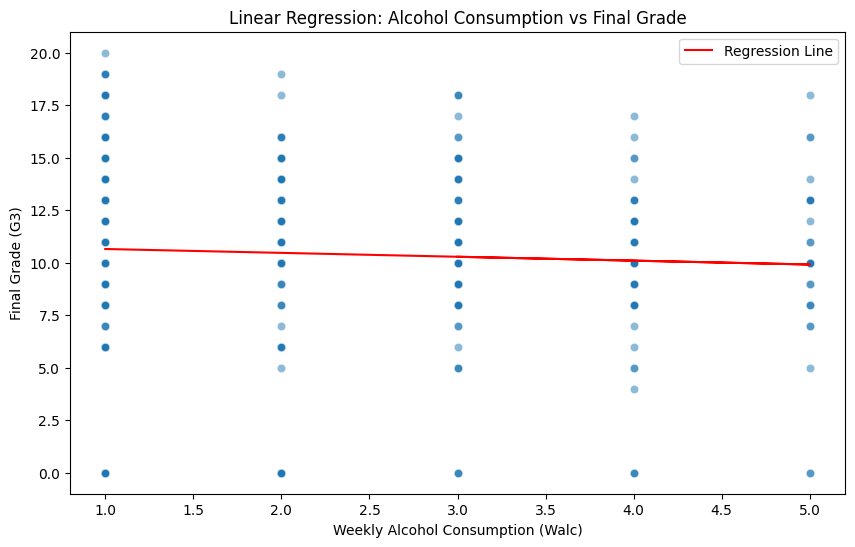

Regression Coefficient (Slope): -0.18476408150615953
Intercept: 10.838510110792594


In [106]:
#### Hypothesis 2 - Testing:
correlation, p_value_corr = stats.pearsonr(df['Walc'], df['G3'])
print("Hypithesis 2:  Higher alcohol conusmption (weekly) affects final grade (G3) negatively. ")
print(f"Pearson Correlation Coefficient: {correlation}, P-value: {p_value_corr}")
if p_value_corr < 0.05:
    print("Statistically significant correlation between alcohol consumption and final grade.")
else:
    print("No statistically significant correlation between alcohol consumption and final grade.")
    
##### Linear Refression to show the result more clearly:
X = df['Walc'].values.reshape(-1, 1)
y = df['G3'].values
model = LinearRegression()
model.fit(X, y)

###### To plot the linear regression:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Walc', y='G3', data=df, alpha=0.5)
plt.plot(df['Walc'], model.predict(X), color='red', label='Regression Line')
plt.title('Linear Regression: Alcohol Consumption vs Final Grade')
plt.xlabel('Weekly Alcohol Consumption (Walc)')
plt.ylabel('Final Grade (G3)')
plt.legend()
plt.show()

print(f"Regression Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

In [119]:
### **Results/Reporting**
##### -> Function: Summarize key findings of my hypothesis testing and concluding whether my data supports my two hypotheses or not.

###### For Hypothesis #1, an independent t-test was conducted to compare study times between students with parents at home versus those without.
###### For Hypothesis #2, Pearson correlation was calculated to determine the relationship between weekly alcohol consumption and final grades, 
###### supplemented by linear regression analysis to visualize the relationship.


###### For hypothesis 1, the testing resulted in a t-stat value of 0.7234 and a p-value of 0.4710. Soley based on these values the conclusion would be that my hypothesis is not correct since there is no statically significant difference in study time between students w/ and w/out parents at home.  However, I would like to point out that although the cutoff for p-value is 0.5, my value is 0.47 so I would like to believe that there could be a p

###### For hypothesis 2, the testing resulted in a Pearson Correlation Coefficient value of -0.0519 and a p-value of 0.3032. Soley based on these values the conclusion would be that my hypothesis is not correct since there is no statistically significant correlation between weekly alcohol consumption and final grades. However, the linear regression showed a regression coefficient (slope) of -0.1848,  which indicates a slight negative trend so the linear regression does show a weak correlation that would support my hypothesis.

###### In conclusion, purely going based on statistics, both of my hypotheses are not supported.